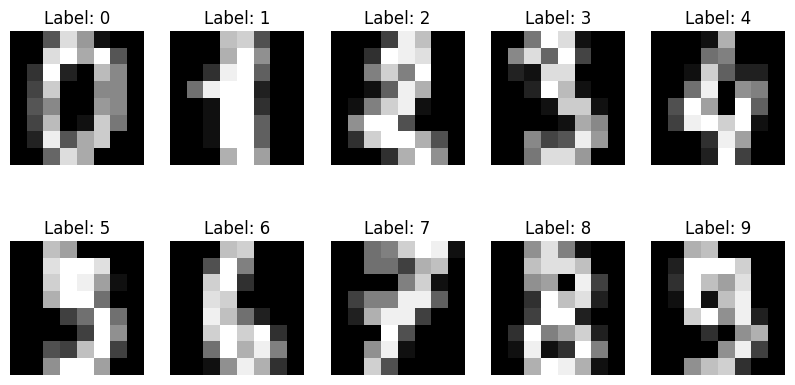

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

# Load
digits = load_digits()

# Inspect Shapes
# TODO: Print digits.data.shape and digits.images.shape
X = digits.data

# Create a grid of 2 rows x 5 columns (10 images total)
fig, axes = plt.subplots(2, 5, figsize=(10,5))

for i, ax in enumerate(axes.flat):
    # Show image i
    ax.imshow(digits.images[i], cmap='gray')

    # Clean up (remove axis ticks for better look)
    ax.axis('off')

    # Optional: Add label
    ax.set_title(f"Label: {digits.target[i]}")

X_centered shape: (1797, 64)


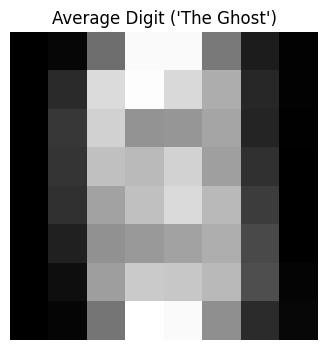

In [2]:
feat_means = np.mean(X, axis=0)

# Visualize the Mean Digit
mean_img = feat_means.reshape(8, 8)

plt.figure(figsize=(4, 4))
plt.imshow(mean_img, cmap='gray')
plt.title("Average Digit ('The Ghost')")
plt.axis('off')
plt.show

# Center the Data
X_centered = X - feat_means

print(f"X_centered shape: {X_centered.shape}")



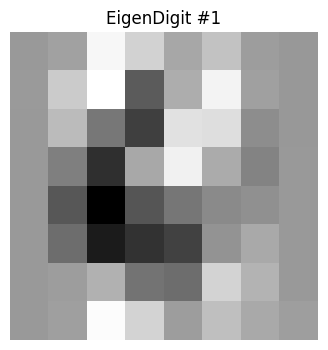

In [3]:
# Compute SVD
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

# Visualize the First EigenDigit
plt.figure(figsize=(4, 4))
plt.imshow(Vt[0].reshape(8, 8), cmap='gray')
plt.title("EigenDigit #1")
plt.axis('off')
plt.show()

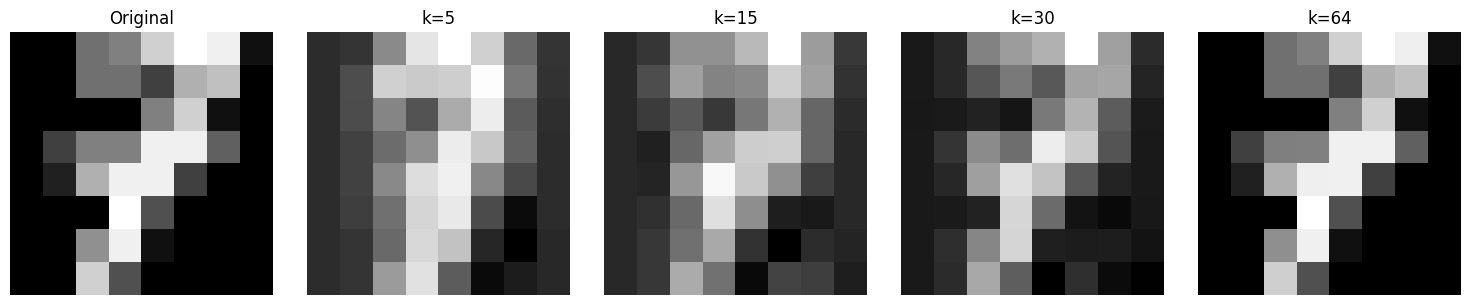

In [8]:
sample_idx = 7

# Component list
ks = [5, 15, 30, 64]

# Plot setup
fig, axes = plt.subplots(1, len(ks) + 1, figsize=(15,3))

original_img = X[sample_idx].reshape(8, 8)
axes[0].imshow(original_img, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

# Loop
for i, k in enumerate(ks):
    # TODO: Recalcular a aproximacao de rank-k
    # Dica: Use slicing U[:, :k], S[:k], Vt[:k, :]    
    A_k = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]

    # TODO: Somar a media (feat_means)
    A_k = A_k + feat_means

    # TODO: Pegar a linha sample_idx do resultado,
    # reshape(8, 8) e plotar no axes[i+1]
    img_rec = A_k[7].reshape(8,8)

    ax = axes[i+1]
    ax.imshow(img_rec, cmap='gray')
    ax.set_title(f"k={k}")
    ax.axis('off')

plt.tight_layout()
plt.show()

    